### Naive Bayes Classifier

In [1]:
# import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,NaN,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
# Drop the Nan value from the data set
dataset.dropna(inplace=True)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0


In [4]:
# Split data for input and output
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:, -1].values
X[0]

array([   35., 20000.])

In [5]:
# Apply feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[0]

array([-0.27591617, -1.4582613 ])

In [15]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
# Apply the Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [17]:
# Prediction (new data)
y_pred = model.predict(X_test)

In [18]:
K = model.predict([[-0.27591617, -1.4582613 ]])
K

array([0], dtype=int64)

In [19]:
# Model evaluation after learning
from sklearn.metrics import accuracy_score , precision_score , recall_score
acc = accuracy_score(y_pred , y_test)
precision = precision_score(y_pred , y_test)
recall = recall_score(y_pred , y_test)
print("Precision = ",precision) # tp / (tp+fp)
print("Recall = ",recall) # tp / (tp+fn)
print("Accuracy  = ",acc) # tp+fn / (tp+tn+fp+fn)

Precision =  0.8275862068965517
Recall =  0.96
Accuracy  =  0.9230769230769231


In [20]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  1]
 [ 5 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


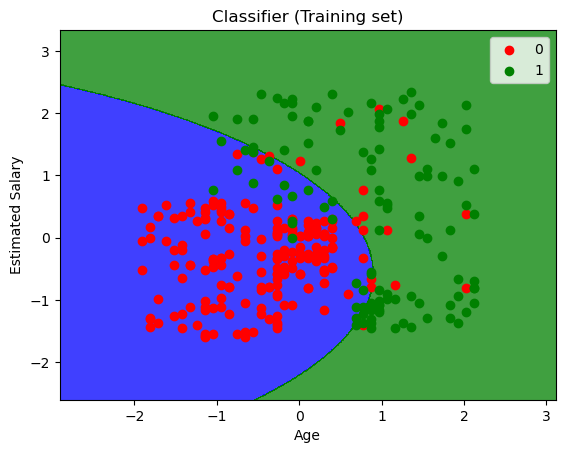

In [21]:
# visualization data 
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()